<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cat or Dog </h1>
</div>

<div style="display: flex; background-color: blue;" >

# 1.Contexte du projet
</div>

Dans ce projet, vous apprendrez les bases des CNN, leur structure, leurs composants et leur fonctionnement, et vous apprendrez pratiquement comment résoudre une tâche d'apprentissage en profondeur de classification d'images, former , et testez un réseau de neurones avec Tensorflow à l'aide d'images.

- Mettez en place un système de veille
- Import the Dataset and Preprocess the Data
- Create and Train the Model
- Test the Model and Make Predictions

### Jalon

Date limite 07/08/2022

### Critères de performance

À la fin de ce projet, vous aurez créé un réseau de neurones profonds avec TensorFlow sur un ensemble de données.

### Livrables

Une présentation type "Powerpoint", faisant office de veille.
Jupyter Notebooks : classification

### Ressources
- train set : https://drive.google.com/drive/folders/1LLBvdZH07dtugxxHDvqArGp9lR7pQZgP?usp=sharing
- validation set : https://drive.google.com/drive/folders/1IoUkz-y_42xv_GzmHTMfb0hdVk-rrWWK?usp=sharing
- cats-train : https://drive.google.com/drive/folders/1xODwWAdtDLPVftnG8wM41sTQxgAbg81G?usp=sharing
- Your First Deep Learning with Keras Step-By-Step : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
- Mettez en place un système de veille : https://openclassrooms.com/fr/courses/4805776-mettez-en-place-un-systeme-de-veille-informationnelle

<div style="display: flex; background-color: blue;" >

# 2.Mes ressources
</div>

- https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/cats_vs_dogs.py
- https://www.tensorflow.org/datasets/catalog/cats_vs_dogs
- https://www.kaggle.com/c/dogs-vs-cats/data
- https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
- https://www.kaggle.com/competitions/dogs-vs-cats/overview

- https://keras.io/examples/vision/image_classification_from_scratch/

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from os import getcwd
from os.path import join
from skimage import io
from cat_or_dog_aurelie import *

<div style="display: flex; background-color: blue;" >

# 2.Chargement des données
</div>

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False

# Récupère le répertoire du programme
file_path = getcwd() + "\\"

print(f"Current execution path : {file_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\


In [3]:
source_data_path = join(file_path,"dataset")
training_data_path = join(source_data_path, "training_set")
validation_data_path = join(source_data_path, "validation_set")
print("Source path :", source_data_path)
print("Training path :", training_data_path)
print("validation path :", validation_data_path)

Source path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset
Training path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\training_set
validation path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\validation_set


<div style="display: flex; background-color: Green; padding: 7px;" >

### Liste des images à récupérer
</div>

In [4]:
from glob import glob

In [5]:
filenames = []
for sub in glob(training_data_path+ "/*/", recursive = True):
    filenames.extend(get_dir_files(dir_path=sub, verbose=0))
print(f"{len(filenames)} files detected.")
print(f"{filenames[0]} to {filenames[-1]}")

2148 files detected.
cat.1.jpg to dog.998.jpg


In [6]:
demo_img = join(training_data_path, 'cat',filenames[0])
demo_img

'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\projet_cat_or_dog\\dataset\\training_set\\cat\\cat.1.jpg'

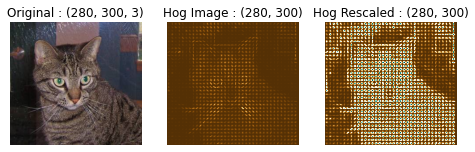

In [7]:
img_cloudy, resized_img_cloudy, hog_image_cloudy = show_hog(img_path=demo_img)

<div style="display: flex; background-color: Green; padding: 7px;" >

### Chargemement des images via keras
</div>

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
image_size = (256, 256)
batch_size = 32

In [10]:
train_ds = get_dataset(
    training_data_path,image_size,batch_size,
    color_mode='grayscale', # "grayscale", "rgb", "rgba"
)
val_ds = get_dataset(
    validation_data_path,image_size,batch_size,
    color_mode='grayscale', # "grayscale", "rgb", "rgba"
)

Found 2148 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


<div style="display: flex; background-color: Green; padding: 7px;" >

### Visualisation
</div>

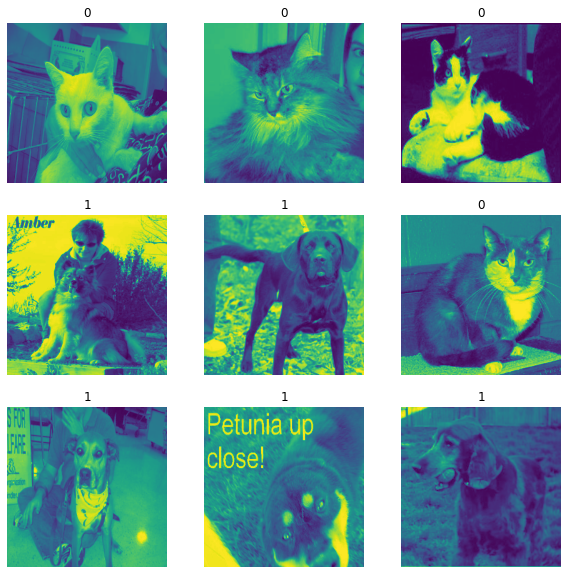

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


<div style="display: flex; background-color: blue;" >

# 3.Pre-processing
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### data augmentation : oui ou non ?
</div>

A priori lorsqu'on dispose de peu de données il est recommandé d'appliquer ce traitement pour avoir différents points de vue d'une même image et donc avoir plus de données.

In [12]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

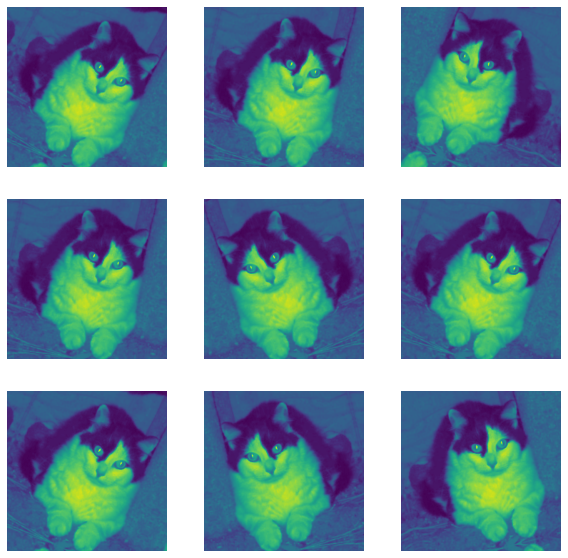

In [13]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


<div style="display: flex; background-color: Green; padding: 7px;" >

### Standardizing the data
</div>

- size (180x180)
- RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer at the start of our model

<div style="display: flex; background-color: indigo;" >

#### Option 1: Make it part of the model
</div>

With this option, your data augmentation will happen on device, synchronously with the rest of the model execution, meaning that it will benefit from GPU acceleration.

Note that data augmentation is inactive at test time, so the input samples will only be augmented during fit(), not when calling evaluate() or predict().

If you're training on GPU, this is the better option.

<div style="display: flex; background-color: indigo;" >

#### Option 2: apply it to the dataset, so as to obtain a dataset that yields batches of augmented images, like this
</div>

With this option, your data augmentation will happen on CPU, asynchronously, and will be buffered before going into the model.

If you're training on CPU, this is the better option, since it makes data augmentation asynchronous and non-blocking.

In our case, we'll go with the second option

In [14]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

<div style="display: flex; background-color: Green; padding: 7px;" >

### Configure the dataset for performance
</div>

In [15]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

<div style="display: flex; background-color: blue;" >

# 4.Build a model
</div>

In [16]:
nb_dim = 2
input_shape=image_size

if nb_dim > 2:
    input_shape=image_size + (nb_dim,)
input_shape

(256, 256)

In [18]:
model = make_model(input_shape=input_shape, num_classes=2, nb_dim=3)
keras.utils.plot_model(model, show_shapes=True)

ValueError: Input 0 of layer "conv2d_1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 256, 256)

<div style="display: flex; background-color: Green; padding: 7px;" >

### Train the model
</div>

In [17]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("model_check_point/gray/save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)


Epoch 1/10


ValueError: in user code:

    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model" (type Functional).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 256, 256, 1)
    
    Call arguments received by layer "model" (type Functional):
      • inputs=tf.Tensor(shape=(None, 256, 256, 1), dtype=float32)
      • training=True
      • mask=None


<div style="display: flex; background-color: Green; padding: 7px;" >

### Run inference on new data
</div>

In [ ]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/6779.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)


<div style="display: flex; background-color: blue;" >

# ANNEXES
</div>

In [21]:
just to fail

SyntaxError: invalid syntax (693838000.py, line 1)

1. Load Data.
1. Define Keras Model.
1. Compile Keras Model.
1. Fit Keras Model.
1. Evaluate Keras Model.
1. Tie It All Together.
1. Make Predictions

<div style="display: flex; background-color: Green; padding: 7px;" >

### Création de la DF
</div>

In [6]:
categories=[]
categories_names = []
file_type = []
img_height = []
img_width = []
img_dims = []

for f_name in filenames:
    category=f_name.split('.')[0]
    categories_names.append(category)
    file_type.append(f_name.split('.')[-1])
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
    coins_image = io.imread(join(training_data_path, f_name))
    img_h = np.nan
    img_w = np.nan
    img_dim = 3

    if coins_image is not None:
        img_w = coins_image.shape[0]
        img_h = coins_image.shape[1]
        img_dim = coins_image.shape[2]
    
    img_height.append(img_h)
    img_width.append(img_w)
    img_dims.append(img_dim)
        
df=pd.DataFrame({
    'file_name':filenames,
    'file_type':file_type,
    'category_name':categories_names,
    'category':categories,
    'img_height':img_height,
    'img_width':img_width,
    'nb_dim':img_dims,
})
df

,file_name,file_type,category_name,category,img_height,img_width,nb_dim
0,cat.1.jpg,jpg,cat,0,300,280,3
1,cat.100.jpg,jpg,cat,0,403,499,3
2,cat.1000.jpg,jpg,cat,0,150,149,3
3,cat.1003.jpg,jpg,cat,0,259,269,3
4,cat.101.jpg,jpg,cat,0,296,200,3
...,...,...,...,...,...,...,...
2143,dog.987.jpg,jpg,dog,1,310,500,3
2144,dog.988.jpg,jpg,dog,1,375,499,3
2145,dog.994.jpg,jpg,dog,1,500,331,3
2146,dog.997.jpg,jpg,dog,1,249,181,3


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

In [7]:
image_Width=max(img_width)
image_Height=max(img_height)
image_Channels=max(img_dims)
print(image_Width, image_Height, image_Channels)
print("min", min(img_width), min(img_height))

702 1050 3
min 41 59


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_Width,image_Height,image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])